In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import tqdm

In [84]:
class Generator(nn.Module):
    def __init__(self,nz=10,DIM=16,channels=1):
        super(Generator, self).__init__()
        
        self.layer0 = nn.Sequential(
            
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, DIM * 64, kernel_size=3, stride=1, padding=0, bias=False),
            nn.BatchNorm2d(DIM * 64),
            nn.ReLU(True))
        
        self.layer1 = nn.Sequential(
            
            nn.ConvTranspose2d(DIM * 64, DIM * 32, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(DIM * 32),
            nn.ReLU(True))
            
        self.layer2 = nn.Sequential(
            
            nn.ConvTranspose2d(DIM * 32, DIM * 16, kernel_size=3, stride=2, padding=(0,1), bias=False),
            nn.BatchNorm2d(DIM * 16),
            nn.ReLU(True))
            
        self.layer3 = nn.Sequential(
            
            nn.ConvTranspose2d( DIM * 16, DIM * 8, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(DIM * 8),
            nn.ReLU(True))
        
        self.layer4 = nn.Sequential(
            
            nn.ConvTranspose2d( DIM * 8, DIM * 4, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(DIM * 4),
            nn.ReLU(True))
        
        self.layer5 = nn.Sequential(
            
            nn.ConvTranspose2d( DIM * 4, DIM * 2, kernel_size=3, stride=2, padding=(0,1), bias=False),
            nn.BatchNorm2d(DIM * 2),
            nn.ReLU(True))
            
        self.layer6 = nn.Sequential(
            
            nn.ConvTranspose2d( DIM * 2, DIM, kernel_size=3, stride=2, padding=(1,0), bias=False),
            nn.BatchNorm2d(DIM),
            nn.ReLU(True))
            
        self.layer7 = nn.Sequential(
            
            nn.ConvTranspose2d( DIM, channels, kernel_size=(4,3), stride=2, padding=1, bias=False),
            nn.Tanh()
            
            
        )

    def forward(self, x):
        
        out = self.layer0(x)
        
        out = self.layer1(out)
        
        out = self.layer2(out)
        
        out = self.layer3(out)
        
        out = self.layer4(out)
        
        out = self.layer5(out)
        
        out = self.layer6(out)
        
        out = self.layer7(out)
        
        return out

In [85]:
netG = Generator()

In [86]:
model_path_9100 = 'params/0902/generator_9100.pkl'
model_path_33300 = 'params/0902/generator_33300.pkl'
model_path_39900 = 'params/0902/generator_39900.pkl'
model_path_4000 = 'params/0902/generator_4000.pkl'
netG.load_state_dict(torch.load(model_path_9100))

<All keys matched successfully>

In [87]:
z = torch.rand((60, 10, 1, 1))

In [88]:
image = netG(z)

In [89]:
images = image.to('cpu').detach().numpy().copy()

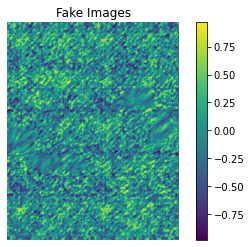

In [90]:
plt.axis("off")
plt.title("Fake Images")
plt.imshow(images[35][0])
plt.colorbar()
plt.show()

In [91]:
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import Subset

In [92]:
# dataset
class Dataset(Dataset):
  
    def __init__(self):
        'Initialization'
        
    def __len__(self):
        'Denotes the total number of samples'
        return 1200
        #return 6 #for testing code
    
    def __getitem__(self, index):
        'Generates one sample of data'
        
        # Load data
        X = torch.load('true_data/{}.pt'.format(index))
        return X

In [93]:
BATCH_SIZE = 60

In [94]:
from sklearn.model_selection import train_test_split
dataset = Dataset()
train_index, valid_index = train_test_split(range(len(dataset)), test_size=0.2)
train_data = Subset(dataset,train_index)
valid_data = Subset(dataset,valid_index)
dataloader_train = DataLoader(dataset = train_data, batch_size=BATCH_SIZE,
                                         shuffle=True)
dataloader_valid = DataLoader(dataset=valid_data, batch_size=BATCH_SIZE,shuffle=False)

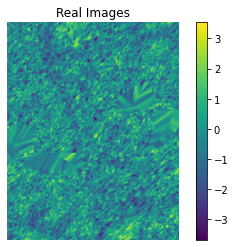

In [95]:
# Grab a batch of real images from the dataloader
real_batch = next(iter(dataloader_valid))

# Plot the real images
plt.axis("off")
plt.title("Real Images")
plt.imshow(real_batch[35][0])
plt.colorbar()
plt.show()

In [96]:
def NCC(real,fake):
    x=len(real)
    y=len(real[0])
    sum_xy=0
    sum_x=0
    sum_y=0
    for j in range(y):
        for i in range(x):
            sum_xy+=real[i][j]*fake[i][j]
            sum_x+=real[i][j]**2
            sum_y+=fake[i][j]**2
    return sum_xy/torch.sqrt(sum_x*sum_y)

In [97]:
m = 0
index = 0
for i in tqdm.tqdm(range(len(real_batch))):
    c = NCC(real_batch[i][0],images[i][0])
    if c > m:
        m = c
        index = i
print(m,index)

100%|██████████| 60/60 [05:21<00:00,  5.35s/it]

tensor(0.0423) 23


In [100]:
data = torch.load("./../../../chikazoeG_NAS/Ishii/from_remote/to_local/fake.pt")

In [118]:
fake_ishii=data[39][9][0]

In [65]:
import pickle

In [98]:
with open('fake_data_wgan.pickle',mode='wb') as f:
    pickle.dump(images,f)

In [99]:
with open('data.pickle',mode='wb') as f:
    pickle.dump(real_batch,f)